# Regresja wielokrotna 

- regresja wielokrotna
- jakość dopasowania

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson

import matplotlib.pyplot as plt

In [2]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [3]:
carseats_df = carseats.data

## Zadanie 1

1. Wyznacz liniową funkcję regresji opisującą zależność sprzedaży (`Sales`) od wysokości budżetu na reklamę (`Advertising`) i ceny (`Price`).


2. Zweryfikuj dopasowanie modelu `Sales ~ Advertising + Price`:
    
    a) Czy istnieje związek między zmienną zależną a przynajmniej jedną ze zmiennych niezależnych? Jeśli tak, to z którą (z którymi)?
       
    b) Czy wyraz wolny jest istotny w modelu?
       
    c) Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
       
3. Wyznacz model liniowy najlepiej opisujący zależność sprzedaży fotelików samochodowych od pozostałych dostępnych zmiennych:
    
  a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
       
  b) Dla których zmiennych niezależnych $X_j$, $j=1,\ldots,10$ można odrzucić hipotezę zerową  $H_0: \beta_j = 0$?
       
  c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
       
  d) Porównaj dopasowanie obu modeli (większego i mniejszego).
       
       
4. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Sales': np.NaN, 
    'CompPrice': [125.0], 
    'Income': [70.0], 
    'Advertising': [5.0], 
    'Population': [270.0], 
    'Price': [120.0],
    'ShelveLoc': ['Medium'], 
    'Age': [54.0], 
    'Education': [15.0], 
    'Urban': ['Yes'], 
    'US': ['Yes']
})`

5. Oceń jakość dopasowania.

In [4]:

model = smf.ols('Sales~Price+Advertising',data = carseats_df).fit()
#print(model.summary())

print("Wartość statystyki testowej testu F (F-statistic): {}".format(model.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(model.f_pvalue))
print("\n")
# p-value testu F jest małe, co oznacza, że istnieje jakiś predyktor (nie licząc intercepta),
# który jest istotny w modelu

#zobaczmy które z predyktorów

print("Wartość statystki testu t-Studenta")
print(model.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(model.pvalues)
print("\n")
# wszystko jest małe jeśli chodzi o p-wartości co oznacza, że i Price i Advertising
# są istotne w modelu, a dodatkowo intercept też jest istotny

print("Współczynnik determinacji R2 (R-squared): {}".format(model.rsquared))
#relatywnie małe 





Wartość statystyki testowej testu F (F-statistic): 77.90680749447354
P-wartość testu F (Prob (F-statistic)): 2.8710290140996263e-29


Wartość statystki testu t-Studenta
Intercept      21.427734
Price         -10.754562
Advertising     6.809327
dtype: float64


P-wartości testu t-Studenta
Intercept      3.059318e-68
Price          7.596365e-24
Advertising    3.639822e-11
dtype: float64


Współczynnik determinacji R2 (R-squared): 0.2818556033430226


In [5]:
#model ze wszsystkimi zmiennymi
columns = list(carseats_df.columns)
columns.remove('Sales')
features = "+".join(columns)
features
model = smf.ols('Sales~'+features,data = carseats_df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.60e-166
Time:                        23:04:05   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
print("Wartość statystyki testowej testu F (F-statistic): {}".format(fitted.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(fitted.f_pvalue))
print("\n")
# p-value testu F małe, co oznacza, że istnieje jakiś predyktor (nie licząc intercepta),
# który jest istotny w modelu

#zobaczmy które z predyktorów

print("Wartość statystki testu t-Studenta")
print(fitted.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(fitted.pvalues)

# zmienne istotne (o małym p-value)'Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]',
#       'CompPrice', 'Income', 'Advertising', 'Price', 'Age'

Wartość statystyki testowej testu F (F-statistic): 243.37218067933574
P-wartość testu F (Prob (F-statistic)): 1.59926509010143e-166


Wartość statystki testu t-Studenta
Intercept               9.380455
ShelveLoc[T.Good]      31.677773
ShelveLoc[T.Medium]    15.516473
Urban[T.Yes]            1.087720
US[T.Yes]              -1.228577
CompPrice              22.377799
Income                  8.564677
Advertising            11.066035
Population              0.561139
Price                 -35.700171
Age                   -14.471810
Education              -1.070046
dtype: float64


P-wartości testu t-Studenta
Intercept               5.596251e-19
ShelveLoc[T.Good]      1.192737e-109
ShelveLoc[T.Medium]     1.383807e-42
Urban[T.Yes]            2.773938e-01
US[T.Yes]               2.199750e-01
CompPrice               7.935340e-72
Income                  2.579912e-16
Advertising             6.353734e-25
Population              5.750270e-01
Price                  1.175168e-124
Age                 

In [7]:
np.array(model.exog_names)[fitted.pvalues<0.05]

array(['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]',
       'CompPrice', 'Income', 'Advertising', 'Price', 'Age'], dtype='<U19')

In [8]:
#model ze zmiennymi istotnymi (w praktyce tak się robi, w teorii jest to nie do końca dobre
#zmienna nieistotna, która jest współliniowa z jakąś inną, po wyrzuceniu jakiejś innej, 
#nagle stanie się istotna (p-val. zmaleje))
model_red = smf.ols('Sales~ShelveLoc+CompPrice+Income+Advertising+Price+Age',data = carseats_df)
fitted_red = model_red.fit()
fitted_red.summary()
fitted_red

In [9]:
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted.rsquared))
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_red.rsquared))
#Modele mają porównywalne R^2, ale drugi robi to na mniejszej liczbie zmiennych, więc jest lepszy

Współczynnik determinacji R2 (R-squared): 0.8734133434127013
Współczynnik determinacji R2 (R-squared): 0.871982496884308


In [10]:
#predykcja
new_obs = pd.DataFrame({ 'Sales': np.NaN, 'CompPrice': [125.0], 'Income': [70.0],
              'Advertising': [5.0], 'Population': [270.0], 'Price': [120.0], 'ShelveLoc': ['Medium'], 'Age': [54.0],
              'Education': [15.0], 'Urban': ['Yes'], 'US': ['Yes'] })

fitted_red.predict(new_obs)

0    6.753957
dtype: float64

# Graficzna ewaluacja modeli regresji: 
- wykres wartości przewidywanych względem prawdziwych
- wykres residuów względem wartości dopasowanych

### Wykres wartości przewidywanych względem prawdziwych

$(y_i, \hat{y}_i)$

wykres wartości przewidywanych względem prawdziwych.

Przy idealnym dopasowaniu, punkty powinny się układać na prostej y=x.

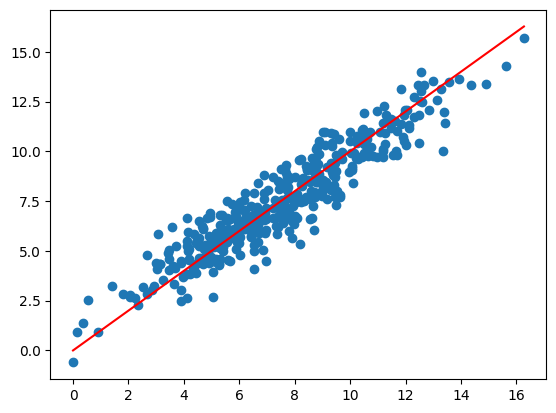

In [11]:
Ylin = np.linspace(carseats_df['Sales'].min(),carseats_df['Sales'].max(),100)
plt.scatter(carseats.data['Sales'],fitted_red.fittedvalues)
plt.plot(Ylin,Ylin,color = 'red')
plt.show()
#tu jest bardzo dobre dopasowanie

## Wykres rezyduów:

1. $(i,e_i)$,

2. $(\hat{y}_i,e_i)$.

Oba wykresy powinny układać się wokół zera, bo błędy modelu mają średnią 0. Wspólna wariancja powinna się wyrażać tym, że żadna podgrupa punktów nie łapie większego odchylenia od prostej $y=0$

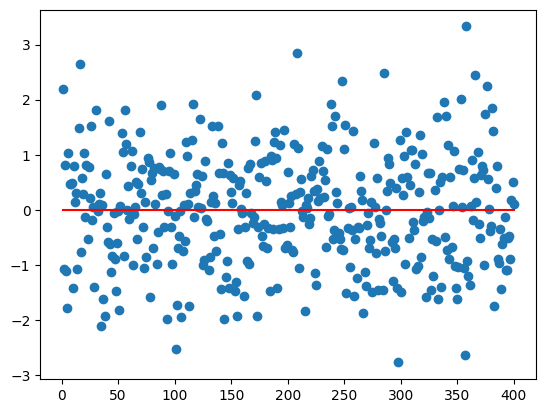

In [12]:
#1 (i,ei)
xrang = np.arange(1,len(fitted_red.resid)+1)
plt.scatter(xrang,fitted_red.resid)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')

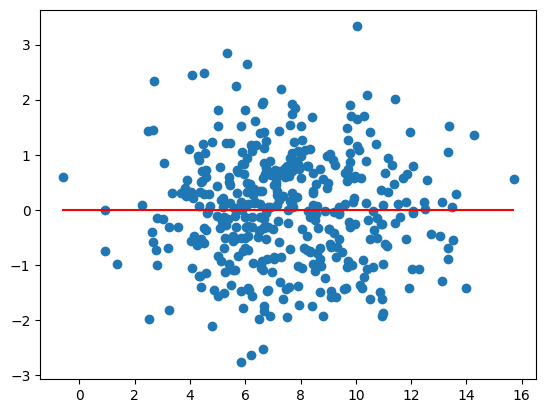

In [13]:
#2 (\hat{y}_i,ei)
xrang = np.arange(fitted_red.fittedvalues.min(),fitted_red.fittedvalues.max(),0.1)
plt.scatter(fitted_red.fittedvalues,fitted_red.resid)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')
#tu obydwa wykresy są ok

### Wykres kwantylowy dla reszt 

Do badania normalności błędów

(reszty teoretyczne vs. reszty empiryczne)

Wykres powinnien układać sie na prostej $y=x$.

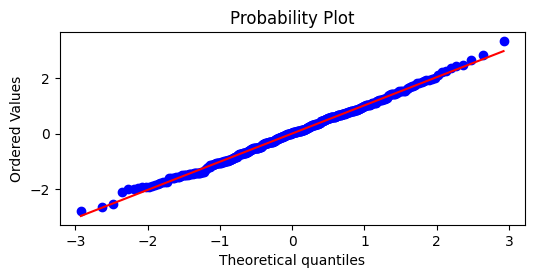

In [14]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(fitted_red.resid,plot = ax,dist = 'norm',fit = True)
plt.show()

# Zadanie 2 

1. Wczytać dane `realest.csv`, które zawierają informacje na temat domów na przedmieściach Chicago: cena domu (`Price`), liczba sypialni (`Bedroom`), powierzchnia w stopach kwadratowych (`Space`), liczba pokoi (`Room`), szerokość frontu działki w stopach (`Lot`), roczny podatek od nieruchomości (`Tax`), liczba łazienek (`Bathroom`), liczba miejsc parkingowych w garażu (`Garage`) i stan domu (`Condition`, 0-dobry, 1-wymaga remontu).
       
2. Wyznacz model liniowy najlepiej opisujący zależność ceny domu od pozostałych zmiennych w zbiorze:
    
  a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
       
  b) Dla których zmiennych niezależnych $X_j$, $j=1,\ldots,10$ można odrzucić hipotezę zerową  $H_0: \beta_j = 0$?
       
  c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
       
  d) Porównaj dopasowanie obu modeli (większego i mniejszego).
  
3. Jaki wpływ na cenę ma zwiększenie liczby sypialni o 1, 
 kiedy wartości wszystkich pozostałych zmiennych objaśniających są ustalone? 
 Znaleźć uzasadnienie tego pozornie błędnego wyniku. Porównać ten wynik  z wynikiem otrzymanym dla modelu linowegoopisującego zależność ceny domu jedynie od liczby sypialni.  

4. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Price': np.NaN, 
    'Bedroom': [3.0], 
    'Space': [1100], 
    'Room': [6.0], 
    'Lot': [32.0], 
    'Tax': [911.0],
    'Bathroom': [1.5], 
    'Garage': [1.0], 
    'Condition': [0.0]
})`

5. Oceń jakość dopasowania.

In [16]:
#1
realest = pd.read_csv('realest.csv')
print(realest)
#są Na wyrzućmy je
realest = realest.dropna(axis =0)
print(realest)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]
     Price  Bedroom   Space  Room   Lot     Tax  Bat

In [17]:
realest.shape

(128, 9)

In [18]:
#2
#model ze wszsystkimi zmiennymi
columns = list(realest.columns)
columns.remove('Price')
features = "+".join(columns)
features
model = smf.ols('Price~'+features,data = realest)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     37.90
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.76e-29
Time:                        23:04:49   Log-Likelihood:                -431.77
No. Observations:                 128   AIC:                             881.5
Df Residuals:                     119   BIC:                             907.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9935      4.081      4.899      0.000      11.912      28.075
Bedroom       -3.1602      0.931     -3.394      0.001      -5.004      -1.317
Space          0.0097      0.004      2.611      0.010       0.002       0.017
Room           1.6890      1.120      1.508      0.134      -0.529       3.907
Lot            0.2362      0.090      2.634      0.010       0.059       0.414
Tax            0.0044      0.003      1.490      0.139      -0.001       0.010
Bathroom       6.3758      2.018      3.160      0.002       2.380      10.371
Garage         4.1448      0.956      4.337      0.000       2.253       6.037
Condition      1.8358      1.797      1.021      0.309      -1.723       5.394
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.361
Skew:                           0.120   Prob(JB):                        0.835
Kurtosis:                       2.899   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print("Wartość statystyki testowej testu F (F-statistic): {}".format(fitted.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(fitted.f_pvalue))
print("\n")
# p-value testu F małe, co oznacza, że istnieje jakiś predyktor (nie licząc intercepta),
# który jest istotny w modelu

#zobaczmy które z predyktorów

print("Wartość statystki testu t-Studenta")
print(fitted.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(fitted.pvalues)

# zmienne istotne (o małym p-value)'Intercept', 'Bedroom ', 'Space',
#       'Lot', 'Bathroom', 'Garage'

Wartość statystyki testowej testu F (F-statistic): 37.90423305879616
P-wartość testu F (Prob (F-statistic)): 2.7551590213656354e-29


Wartość statystki testu t-Studenta
Intercept    4.898879
Bedroom     -3.394327
Space        2.610959
Room         1.507697
Lot          2.634458
Tax          1.490418
Bathroom     3.159694
Garage       4.337439
Condition    1.021470
dtype: float64


P-wartości testu t-Studenta
Intercept    0.000003
Bedroom      0.000935
Space        0.010190
Room         0.134282
Lot          0.009548
Tax          0.138760
Bathroom     0.002003
Garage       0.000030
Condition    0.309104
dtype: float64


In [20]:
np.array(model.exog_names)[fitted.pvalues<0.05]

array(['Intercept', 'Bedroom', 'Space', 'Lot', 'Bathroom', 'Garage'],
      dtype='<U9')

In [21]:
model_red = smf.ols('Price~Bedroom+Space+Lot+Bathroom+Garage',data = realest)
fitted_red = model_red.fit()
fitted_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     59.40
Date:                Sun, 21 May 2023   Prob (F-statistic):           4.59e-31
Time:                        23:04:58   Log-Likelihood:                -433.86
No. Observations:                 128   AIC:                             879.7
Df Residuals:                     122   BIC:                             896.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9651      2.689      9.655      0.000      20.642      31.289
Bedroom       -2.6740      0.638     -4.193      0.000      -3.936      -1.411
Space          0.0154      0.002      7.954      0.000       0.012       0.019
Lot            0.2792      0.086      3.251      0.001       0.109       0.449
Bathroom       6.2081      1.669      3.720      0.000       2.904       9.512
Garage         4.6954      0.885      5.308      0.000       2.944       6.447
==============================================================================
Omnibus:                        0.463   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.606
Skew:                           0.116   Prob(JB):                        0.739
Kurtosis:                       2.756   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted.rsquared))
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_red.rsquared))
#Modele mają porównywalne R^2, ale drugi robi to na mniejszej liczbie zmiennych, więc jest lepszy

Współczynnik determinacji R2 (R-squared): 0.7181656659650734
Współczynnik determinacji R2 (R-squared): 0.708820511203659


In [23]:
#3
#Wróćmy na chwilę do modelu pełnego
print(fitted.params)
#im więcej sypialni tym mniejsza cena. Dlaczego? Jest to spowodowane tym, że reszta zmiennych
#jest ustalona. Lepiej mieć dom o ustalonej powierzchni z mniejszą liczbą pomieszczeń
#niż dom o tej samej powierzchni z większą ilością pomieszczeń

Intercept    19.993468
Bedroom      -3.160239
Space         0.009663
Room          1.688951
Lot           0.236213
Tax           0.004413
Bathroom      6.375786
Garage        4.144757
Condition     1.835795
dtype: float64


In [24]:
#Potwierdzenie
model_red = smf.ols('Price~Bedroom',data = realest)
fitted_red2 = model_red.fit()
print(fitted_red2.params)
#tym razem Bedroom ma dodatni współczynnik, im większa liczba sypialni 
#tym większa cena (i prawdopodobnie wówczas tym większa powierzchnia domu) 

Intercept    46.864330
Bedroom       3.084024
dtype: float64


In [25]:
#4
#wracamy do modelu pełnego
newdata = pd.DataFrame({
    'Price': np.NaN, 
    'Bedroom': [3.0], 
    'Space': [1100.0], 
    'Room': [6.0], 
    'Lot': [32.0], 
    'Tax': [911.0],
    'Bathroom': [1.5], 
    'Garage': [1.0], 
    'Condition': [0.0]
})

print(fitted.predict(newdata))
#ewentualnie dla modelu zredukowanego
newdata2 = pd.DataFrame({
    'Price': np.NaN, 
    'Bedroom': [3.0], 
    'Space': [1100.0], 
    'Lot': [32.0], 
    'Bathroom': [1.5], 
    'Garage': [1.0]
})
print(fitted_red.predict(newdata2))

0    56.563255
dtype: float64
0    57.863901
dtype: float64


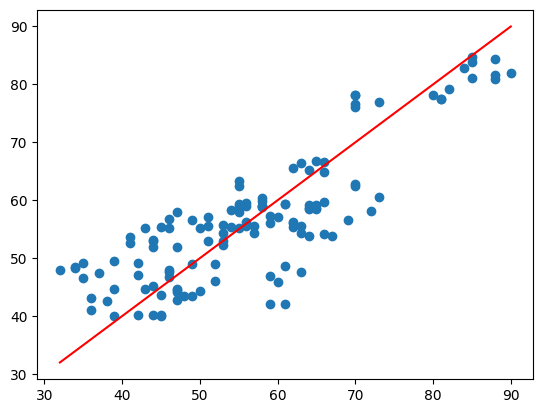

In [26]:
#5
#wykres prawdziwych wartości w zależności od dopasowanych
Ylin = np.linspace(realest['Price'].min(),realest['Price'].max(),100)
plt.scatter(np.array(realest['Price'])[~np.isnan(realest['Price'])],fitted_red.fittedvalues)
plt.plot(Ylin,Ylin,color = 'red')
plt.show()
#tu jest dosyć dobre dopasowanie

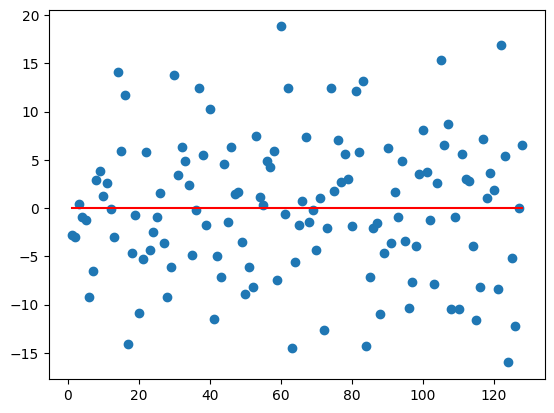

In [27]:
#rezydua vs indeks obserwacji
xrang = np.arange(1,len(fitted_red.resid)+1)
plt.scatter(xrang,fitted_red.resid)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')
#układają się równomiernie wokół 0

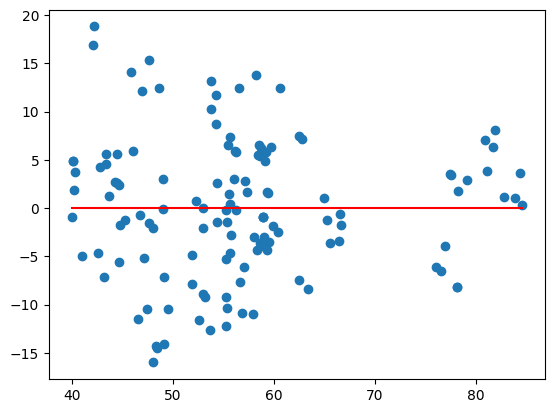

In [28]:
#rezydua vs dopasowana wartość
plt.scatter(fitted_red.fittedvalues, fitted_red.resid)
xrange = np.arange(fitted_red.fittedvalues.min(), fitted_red.fittedvalues.max(), 0.1)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')

plt.show()
#układają się równomiernie wokół 0 co ciekawe nie ma domów o cenie około 70,
#są albo droższe albo tańsze

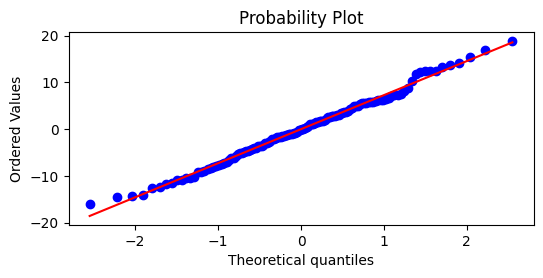

In [29]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(fitted_red.resid,plot = ax,dist = 'norm',fit = True)
plt.show()
#mamy normalność